In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [8]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [10]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [12]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [13]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
## finding all columns that have nan:
droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [15]:
# filling nan with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [16]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [18]:
## EDA
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


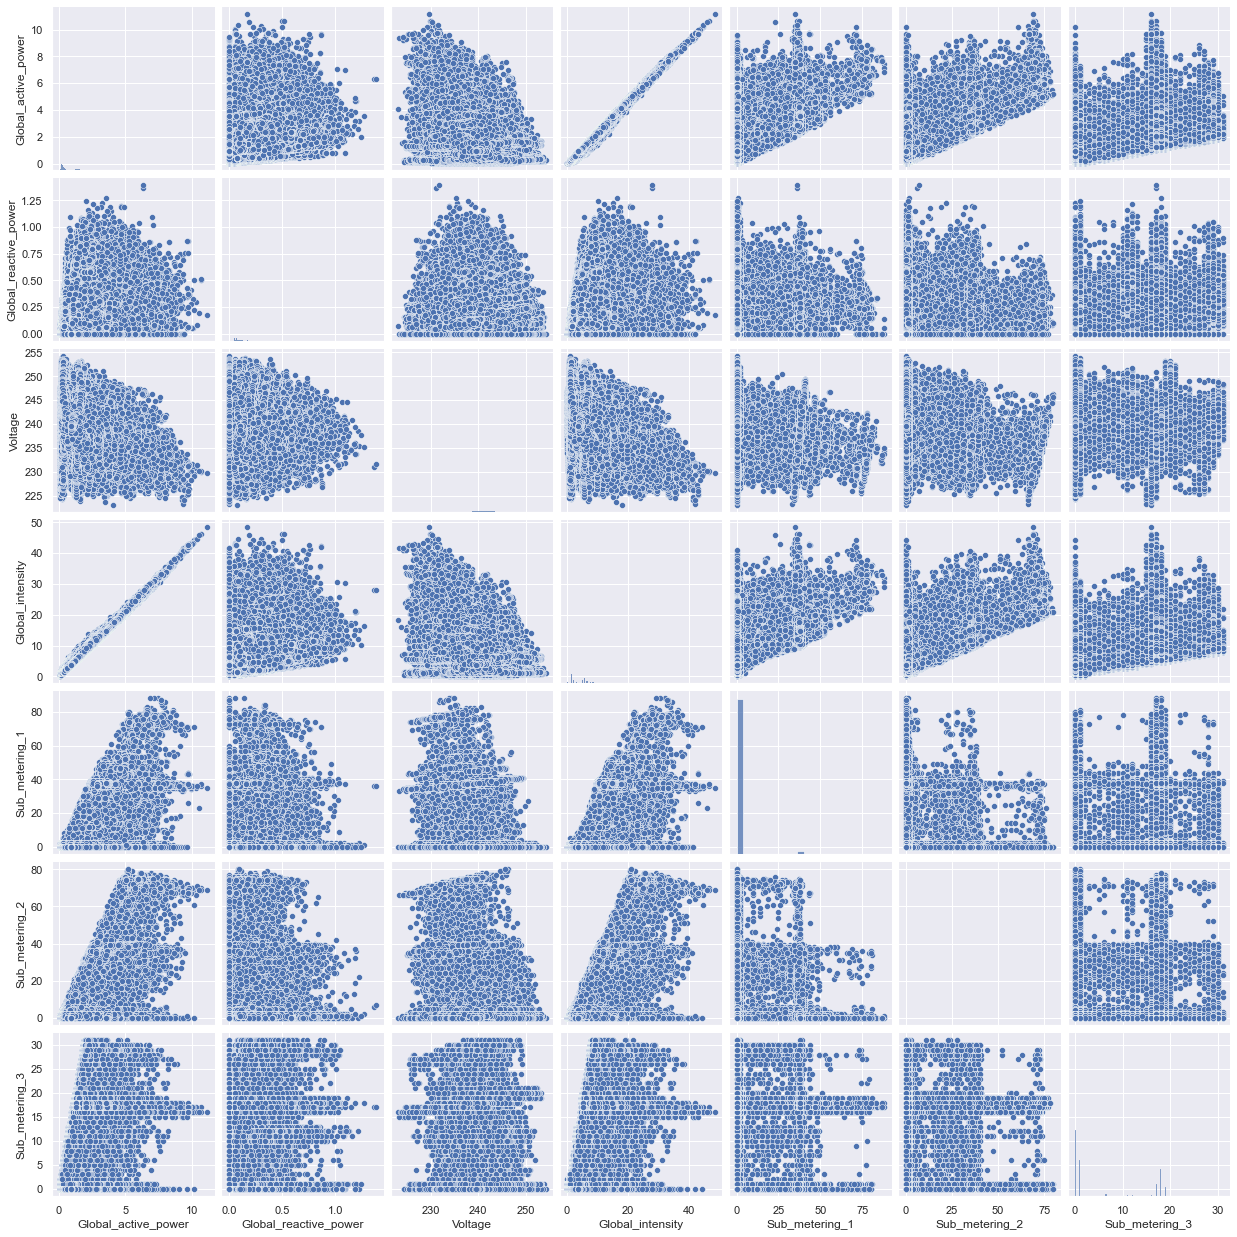

In [26]:
sns.pairplot(df)

<AxesSubplot:>

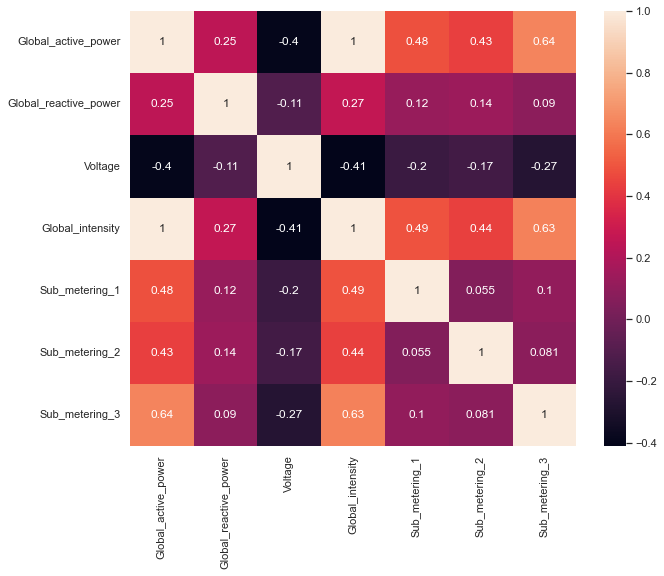

In [23]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'Global_reactive_power')

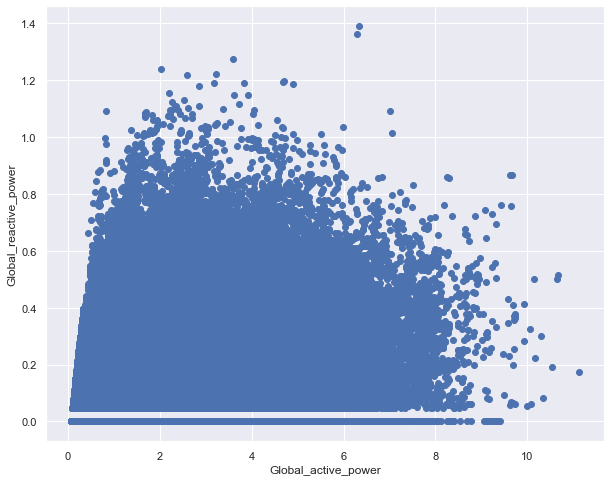

In [24]:
plt.scatter(df['Global_active_power'],df['Global_reactive_power'])
plt.xlabel("Global_active_power")
plt.ylabel("Global_reactive_power")

In [83]:
## Independent And Dependent Features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [84]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
dt,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0


In [85]:
y

dt
2006-12-16 17:24:00    17.0
2006-12-16 17:25:00    16.0
2006-12-16 17:26:00    17.0
2006-12-16 17:27:00    17.0
2006-12-16 17:28:00    17.0
                       ... 
2010-11-26 20:58:00     0.0
2010-11-26 20:59:00     0.0
2010-11-26 21:00:00     0.0
2010-11-26 21:01:00     0.0
2010-11-26 21:02:00     0.0
Name: Sub_metering_3, Length: 2075259, dtype: float64

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=10)

In [87]:
X_train.shape

(1390423, 6)

In [88]:
y_train.shape

(1390423,)

In [89]:
X_test.shape

(684836, 6)

In [90]:
y_test.shape

(684836,)

In [91]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [92]:
scaler

StandardScaler()

In [93]:
X_train=scaler.fit_transform(X_train)

In [94]:
X_test=scaler.transform(X_test)

In [95]:
X_train

array([[-0.92085083, -1.10496401, -1.73127903, -0.91187771, -0.18356812,
        -0.22423443],
       [ 0.22723028,  1.50470483,  0.1358608 ,  0.2658021 , -0.18356812,
        -0.22423443],
       [ 0.8917084 , -0.56873069,  0.58012202,  0.854642  , -0.18356812,
         0.12265138],
       ...,
       [-0.7323599 , -0.60447958,  0.29119689, -0.7306962 , -0.18356812,
        -0.22423443],
       [ 1.17158887,  1.98731483, -1.14100188,  1.21700502, -0.02017174,
        -0.22423443],
       [-0.72855201,  1.18296484,  0.1513944 , -0.68540083, -0.18356812,
        -0.22423443]])

In [96]:
X_test

array([[ 2.93900648e-04,  6.99735566e-04, -8.79089172e-04,
         3.16676625e-04, -2.49909711e-04,  9.84647211e-04],
       [ 2.93900648e-04,  6.99735566e-04, -8.79089172e-04,
         3.16676625e-04, -2.49909711e-04,  9.84647211e-04],
       [ 3.92873824e-01,  7.53978179e-01,  4.52746422e-01,
         3.56392853e-01, -1.83568119e-01, -2.24234430e-01],
       ...,
       [ 5.01398905e-01, -1.10496401e+00,  1.82461623e-01,
         4.46983608e-01, -1.83568119e-01, -2.24234430e-01],
       [-6.40738824e-02,  2.20180816e+00, -6.59459995e-01,
        -5.12655430e-02, -1.83568119e-01, -2.24234430e-01],
       [ 4.06201466e-01,  6.28857070e-01, -2.08985329e-01,
         3.56392853e-01, -1.83568119e-01, -2.24234430e-01]])

Model

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
regression=LinearRegression()

In [99]:
regression

LinearRegression()

In [100]:
regression.fit(X_train,y_train)

LinearRegression()

In [101]:
print(regression.coef_)

[ 42.6348024    0.20127159  -0.62240603 -35.45636742  -2.4641402
  -2.22070846]


In [102]:
print(regression.intercept_)

6.455374104015775


In [103]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [104]:
reg_pred

array([ 6.45579348,  6.45579348, 11.38933519, ..., 12.5983361 ,
        7.34519689, 12.34423905])

Assumpation of LR

Text(0, 0.5, 'Test Predicted Data')

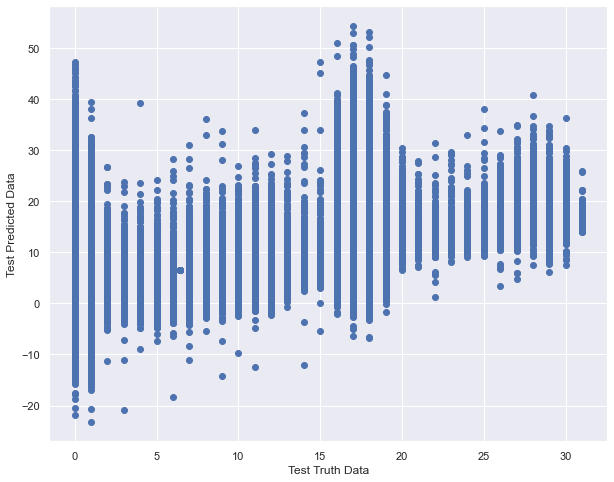

In [105]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [106]:
## residuals
residuals=y_test-reg_pred

In [107]:
residuals

dt
2010-01-14 10:29:00    0.002654
2009-06-14 03:31:00    0.002654
2009-04-12 02:11:00    7.610665
2009-07-04 16:18:00    5.789690
2009-02-01 21:27:00   -7.893444
                         ...   
2010-09-28 06:53:00    0.002654
2008-09-04 14:47:00    0.055179
2010-03-06 10:21:00    5.401664
2010-05-29 17:27:00   -6.345197
2008-09-28 13:46:00    5.655761
Name: Sub_metering_3, Length: 684836, dtype: float64

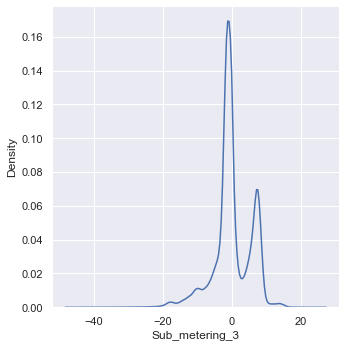

In [108]:
sns.displot(residuals,kind="kde")

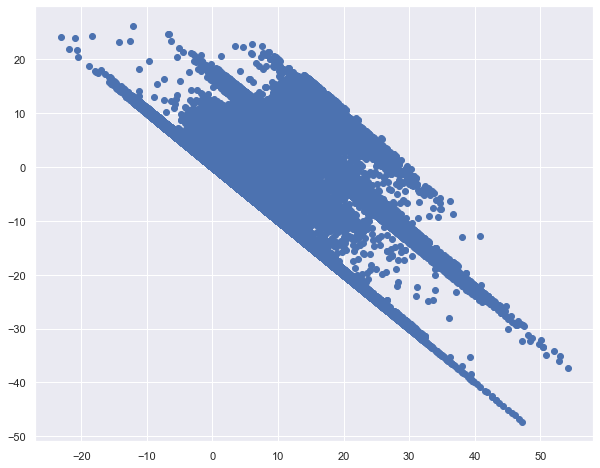

In [109]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [110]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

30.37898591851054
3.9682169007280494
5.5117135192706215


In [111]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5681651882022561


In [112]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5681614047630753

In [113]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()


In [114]:
rf=ridge.fit(X_train,y_train)

Ridge()

In [132]:
rr=ridge.predict(X_test)

In [133]:
rr


array([ 6.45579335,  6.45579335, 11.38809398, ..., 12.59770877,
        7.34385206, 12.34230006])

In [134]:
rp= ridge.predict(X_train)

In [135]:
rp

array([ 1.33219555,  7.88814098, 13.87506269, ...,  1.7868522 ,
       14.91355359,  0.79011336])

In [136]:
print(np.sqrt(mean_squared_error(y_train,rp)))

print(r2_score(y_train, rp))

5.5078257135448485
0.5682773114894866


In [137]:
print(np.sqrt(mean_squared_error(y_test,rr))) 

print(r2_score(y_test, rr))

5.511712562641748
0.5681653381032308


Lasso

In [139]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [140]:
clf.fit(X_train,y_train)

Lasso(alpha=0.1)

In [144]:
lp_test=clf.predict(X_test)

In [145]:
lp_test

array([ 6.45573147,  6.45573147, 10.09839472, ..., 11.64841035,
        6.14141568, 10.28130387])

In [146]:
lp_train=clf.predict(X_train)

In [147]:
lp_train

array([ 0.98639837,  8.57266927, 13.57283758, ...,  2.11617105,
       15.18270035,  1.46456343])

In [142]:
print(clf.coef_)

[ 7.56560881 -0.38467682 -0.0512991   0.         -2.53659011 -2.31149728]


In [143]:
print(clf.intercept_)

6.455374104015704


In [148]:
print(np.sqrt(mean_squared_error(y_train,lp_train)))

print(r2_score(y_train, lp_train))




print(np.sqrt(mean_squared_error(y_test,lp_test))) 

print(r2_score(y_test, lp_test))

5.691787638178803
0.5389565349130794
5.695496613559682
0.5388867806945052


ElasticNet Regression

In [149]:
 from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [150]:
X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(X, y)
ElasticNet(random_state=0)

ElasticNet(random_state=0)

In [162]:
en_regr=regr.predict(X)

In [155]:
en_regr

array([ 128.08702529,   11.63618911,   97.6375812 ,   -1.54910084,
        -17.22713917,   37.76870299,   18.57850448,  -27.62850045,
        166.28682724,  -71.95599087,  -56.14508309,  -23.0895585 ,
        -52.47914777,   14.52574929,   34.75181874,    5.33702343,
        -76.98443115,   38.1465065 ,  -53.76709823,   53.8426016 ,
         52.53023214,   58.46871074,   74.16344945,   11.44360605,
         33.29551131,  -26.85600488,  -38.09581818,   43.27796851,
        -46.20866322,  103.61010485,   66.79112154,  139.0884997 ,
        103.5290681 ,  120.58833771,   59.68544748,   50.95092093,
          8.19461   ,   45.69209468,   44.50385334,  -37.67097275,
        -83.5651984 ,    6.42606256,   29.32182913,  -56.8005358 ,
       -151.05599386,   66.90586201,  -17.40351396,   84.12070956,
        -61.75622906,  106.85258558,  133.24742296,   59.93738142,
         35.77165377,  -92.22297607,  173.09860061,  -18.06451217,
         51.74876678,  -47.30402891,  -29.24926555,  122.87615

In [159]:
print(regr.coef_)

[18.83816048 64.55968825]


In [160]:
print(regr.intercept_)

1.4512607561654032


In [165]:
print(np.sqrt(mean_squared_error(y,en_regr)))

print(r2_score(y, en_regr))


33.762141356291615
0.8904453086976037


support vector regression


In [1]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
model=SVR()

In [5]:
model.fit(X_train,y_train)

NameError: name 'X_train' is not defined